In [68]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import funcs
import imp
import random
imp.reload(funcs)

<module 'funcs' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\intelligence_tRNS\\tRNS-Intelligence\\processing\\funcs.py'>

In [21]:
exp_info = funcs.load_info()
rpm_answers = funcs.load_rpm_answers()
subjects_behavior = funcs.load_subjects_behavior()

c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\intelligence_tRNS\tRNS-Intelligence\processing\funcs.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  subjects_behavior = pd.concat([subjects_behavior, one_behavior], ignore_index=True)


### Accuracy

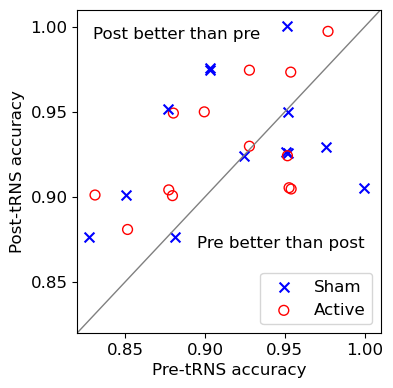

In [22]:
# accuracy
task_times = ['pre', 'post']
subjects_accuracy = np.empty([26, 2]) # 26 subjects, 2 task times

for subject_id in range (1,27):
    for task_time in range(2): # 0=pre and 1=post
        filtered_rows = subjects_behavior[
            (subjects_behavior['subject id'] == subject_id) &
            (subjects_behavior['task time'] == task_times[task_time])
        ]
        corrects = filtered_rows['correct'].sum()
        subjects_accuracy[subject_id-1, task_time] = corrects / len(filtered_rows)

# plot
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(figsize=(10*cm, 10*cm))
markersize = 50
for subject_id in range(1,27):
    fluc_level = 0.003
    fluc_x, fluc_y = random.uniform(-1*fluc_level, fluc_level), random.uniform(-1*fluc_level, fluc_level)
    # fluc_x, fluc_y = 0, 0
    isActive = 1 if exp_info[exp_info['subject id'] == subject_id]['Condition'].iloc[0] == 'Active' else 0
    coord = subjects_accuracy[subject_id-1, :]
    # ax.scatter(coord[0]+fluc_x, coord[1]+fluc_y, s=50, c='red' if isActive else 'blue', marker='o' if isActive else 'x')
    if isActive:
        ax.scatter(coord[0]+fluc_x, coord[1]+fluc_y, s=markersize, edgecolors='red', facecolors='none', marker='o', label='Active' if subject_id == 2 else "")
    else:
        ax.scatter(coord[0]+fluc_x, coord[1]+fluc_y, s=markersize, color='blue', marker='x', label='Sham' if subject_id == 1 else "")

# Plot line from (0,0) to (1,1)
matplotlib.rcParams.update({'font.size': 12})
ax.plot([0, 1.1], [0, 1.1], color='grey', linewidth=1)
ax.text(0.83, 0.993, 'Post better than pre', fontsize=12)
ax.text(0.895, 0.87, 'Pre better than post', fontsize=12)

ax.set_xlim([0.82, 1.01])
ax.set_ylim([0.82, 1.01])

# ax.set_xlim([0.7, 1.01])
# ax.set_ylim([0.7, 1.01])

ax.set_xticks((0.85, 0.9, 0.95, 1.0))
ax.set_yticks((0.85, 0.9, 0.95, 1.0))
ax.set_xlabel('Pre-tRNS accuracy')
ax.set_ylabel('Post-tRNS accuracy')
ax.legend(loc='lower right', fontsize=12)
# Adjust layout and margins
# plt.tight_layout(pad=1.0)
fig.subplots_adjust(left=0.2, bottom=0.14, right=0.97, top=0.96)
# plt.title(fig_title, pad=3)
save_path = os.path.join('..', '..', '..', 'paper', 'behavior', 'coord_prepost_all.png')
plt.savefig(save_path, format='png', dpi=600)

plt.show()

### Reaction time

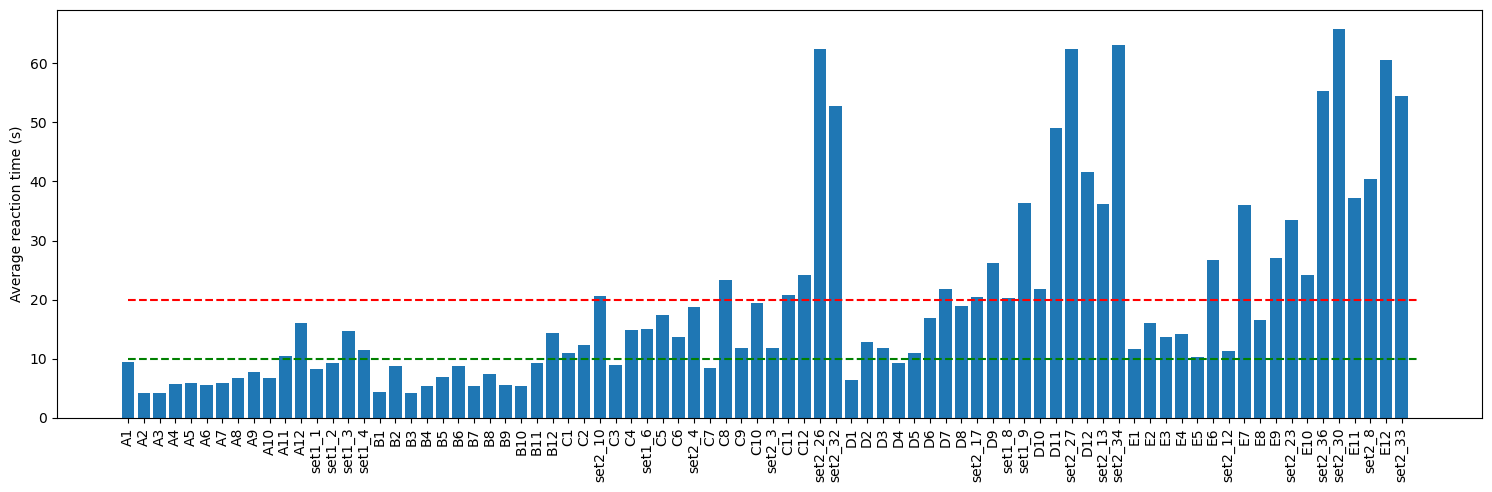

In [89]:
rpm_difficulty = pd.DataFrame(columns=['question', 'average time', 'difficulty'])
rpm_difficulty['question'] = rpm_answers['question'][0:82]
df = subjects_behavior[(subjects_behavior['reaction time'] != 0) & (subjects_behavior['task time'] == 'pre')]
for i in range(82):
    question_index = rpm_difficulty['question'][i]
    rts = df[df['question'] == question_index]['reaction time']
    rpm_difficulty['average time'][i] = rts.mean()
    

fig = plt.figure(figsize=(15, 5))
plt.bar(rpm_difficulty['question'], rpm_difficulty['average time'])
plt.xticks(rotation=90)
plt.hlines(10, 0, 82, colors='g', linestyles='dashed')
plt.hlines(20, 0, 82, colors='r', linestyles='dashed')

plt.ylabel('Average reaction time (s)')

plt.tight_layout(pad=1.0)

save_path = os.path.join('..', '..', '..', 'paper', 'behavior', 'rt_bar_question.png')
plt.savefig(save_path, format='png', dpi=600)
plt.show()

# 3-level difficulty
count1 = (rpm_difficulty['average time'] < 10).sum()
count2 = ((rpm_difficulty['average time'] >= 10) & (rpm_difficulty['average time'] < 20)).sum() 
count3 = (rpm_difficulty['average time'] > 20).sum()

# 4-level difficulty
# count1 = (rpm_difficulty['average time'] < 8).sum()
# count2 = ((rpm_difficulty['average time'] >= 8) & (rpm_difficulty['average time'] < 13)).sum() 
# count3 = ((rpm_difficulty['average time'] >= 13) & (rpm_difficulty['average time'] < 23)).sum()
# count4 = (rpm_difficulty['average time'] > 23).sum()


In [90]:
task_times = ['pre', 'post']
conditions = ['Sham', 'Active']
df = subjects_behavior[subjects_behavior['reaction time'] != 0]

rt_table = pd.DataFrame(columns=['question', 'condition', 'task time', 'average time', 'STD', 'SEM'])
# rt_table['question'] = rpm_answers['question'][0:82]
df = subjects_behavior[(subjects_behavior['reaction time'] != 0)]

for i in range(82):
    for condition in conditions:    
        for task_time in task_times:
                df_filtered = df[
                    (df['question'] == rpm_answers['question'][i]) &
                    (df['condition'] == condition) &
                    (df['task time'] == task_time)
                ]
                rts = df_filtered['reaction time']
                one_row = {
                    'question': rpm_answers['question'][i],
                    'condition': condition,
                    'task time': task_time,
                    'average time': rts.mean(),
                    'STD': np.nan_to_num(rts.std(), nan=0),
                    'SEM': np.nan_to_num(rts.sem(), nan=0)
                }
                rt_table = pd.concat([rt_table, pd.DataFrame([one_row])])


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_17436\2222945695.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rt_table = pd.concat([rt_table, pd.DataFrame([one_row])])


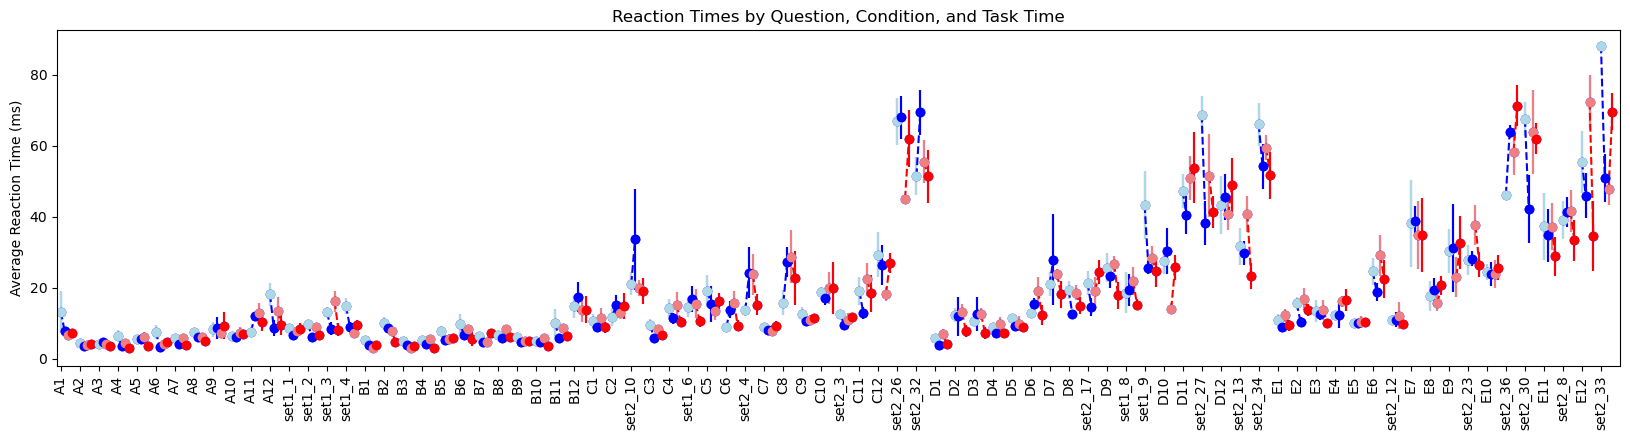

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming rt_table is already created and contains the necessary data.
# Extract unique questions to plot
questions = rt_table['question'].unique()
num_questions = len(questions)

# Colors for different conditions and times
# colors = {
#     ('Sham', 'pre'): 'lightblue',
#     ('Sham', 'post'): 'blue',
#     ('Active', 'pre'): 'lightcoral',
#     ('Active', 'post'): 'red'
# }
colors = ['lightblue', 'blue', 'lightcoral', 'red']

# Initialize plot
fig, ax = plt.subplots(figsize=(num_questions * 0.2, 4.5))  # Adjusting width for each question

# Iterate over each question to plot the mean and error bars
for idx, question in enumerate(questions):
    subset = rt_table[rt_table['question'] == question]
    
    # Sort subset to ensure consistent order [Sham pre, Sham post, Active pre, Active post]
    subset = subset.sort_values(by=['condition', 'task time'], ascending=[False, False])

    # Collect means, std errors, and labels
    means = subset['average time'].values
    std_errors = subset['SEM'].values  # using SEM for error bars
    # labels = [f'{cond} {time}' for cond, time in zip(subset['condition'], subset['task time'])]

    # Plot data points and connect lines within each condition
    x_vals = np.arange(len(means)) + idx * (len(means) + 1)  # Offset each group of points
    
    ax.errorbar(x_vals, means, yerr=std_errors, fmt='o', color='blue')
    for i in range (0,4):
        ax.errorbar(x_vals[i], means[i], yerr=std_errors[i], marker='o', color=colors[i])

    ax.plot(x_vals[0:2], means[0:2], color='blue', linestyle='--')  # Connect Sham points
    ax.plot(x_vals[2:4], means[2:4], color='red', linestyle='--')  # Connect Active points

# Adjust x-axis
ax.set_xlim(-1, num_questions * (len(means) + 1))
ax.set_xticks(range(0, num_questions * (len(means) + 1), len(means) + 1))
ax.set_xticklabels(questions, rotation=90)

# Add labels and title
ax.set_ylabel('Average Reaction Time (ms)')
ax.set_title('Reaction Times by Question, Condition, and Task Time')

# Adjust layout to make room for labels
fig.tight_layout()

save_path = os.path.join('..', '..', '..', 'paper', 'behavior', 'rt_question_condition_tasktime.png')
plt.savefig(save_path, format='png', dpi=600)
plt.show()


In [92]:
# Define the conditions for the 'difficulty' values
conditions = [
    (rpm_difficulty['average time'] < 10),
    (rpm_difficulty['average time'] >= 10) & (rpm_difficulty['average time'] <= 20),
    (rpm_difficulty['average time'] > 20)
]

# Define the corresponding values to assign under each condition
choices = [1, 2, 3]

# Apply the conditions and choices to the 'difficulty' column
rpm_difficulty['difficulty'] = np.select(conditions, choices)
# rpm_difficulty

In [93]:
# conditions = [
#     (rpm_difficulty['average time'] < 8),
#     (rpm_difficulty['average time'] >= 8) & (rpm_difficulty['average time'] < 13),
#     (rpm_difficulty['average time'] >= 13) & (rpm_difficulty['average time'] < 23),
#     (rpm_difficulty['average time'] > 23)
# ]
# # Define the corresponding values to assign under each condition
# choices = [1, 2, 3, 4]

# # Apply the conditions and choices to the 'difficulty' column
# rpm_difficulty['difficulty'] = np.select(conditions, choices)
# rpm_difficulty

In [136]:
def plot_reaction_times(means, std, sem, fig_title):  
    # Bar chart
    labels = ['Pre-\nsham', 'Post-\nsham', 'Pre-\nactive', 'Post-\nactive']
    colors = ['lightblue', 'blue', 'lightcoral', 'red']

    # Plotting
    cm = 1/2.54  # centimeters in inches
    fig, ax = plt.subplots(figsize=(6*cm, 6*cm))

    # Plotting error bars
    for i in range(4):
        ax.errorbar([labels[i]], [means[i]], yerr=[sem[i]], color=colors[i], marker='o', linestyle='-')

    # Add a line between means[0] and means[1]
    ax.plot(labels[0:2], means[0:2], color='blue', linestyle='--')

    # Add another line connecting means[2] and means[3]
    ax.plot(labels[2:4], means[2:4], color='red', linestyle='--')

    # Add some additional formatting if desired
    ax.set_ylabel('Reaction Time (s)')
    ax.set_title(fig_title)
    # ax.set_yticks(np.arange(ylim[0], ylim[1]+20, 20))
    matplotlib.rcParams.update({'font.size': 10})

    # Adjust layout and margins
    plt.tight_layout(pad=1.0)
    plt.subplots_adjust(left=0.22, bottom=0.18, right=0.93, top=0.91)
    plt.title(fig_title, pad=4)
    save_path = os.path.join('..', '..', '..', 'paper', 'behavior', fig_title + '.png')
    plt.savefig(save_path, format='png', dpi=600)
    plt.show()

removed 15 outliers out of 174

removed 1 outliers out of 176

removed 0 outliers out of 174

removed 1 outliers out of 176

p_sham: 0.008835652713946202, p_active: 0.000268419256546079, p_pre: 2.7667819510068146, p_post: 0.7503592169972094


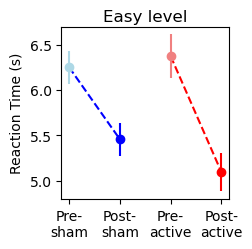

removed 1 outliers out of 173

removed 1 outliers out of 173

removed 11 outliers out of 171

removed 1 outliers out of 172

p_sham: 1.5971640991891811, p_active: 0.024257029618289013, p_pre: 3.4390274376461023, p_post: 0.3046072771189936


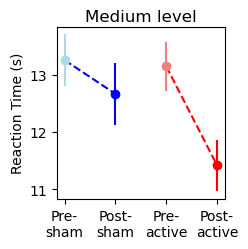

removed 0 outliers out of 143

removed 0 outliers out of 148

removed 0 outliers out of 141

removed 8 outliers out of 148

p_sham: 3.9690138278505733, p_active: 0.03289038127173381, p_pre: 3.766551398659774, p_post: 0.02749078156927251


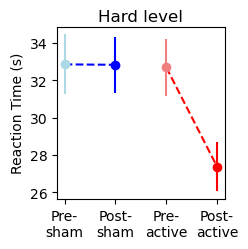

In [137]:
difficulties = choices
difficulty_names = ['Easy', 'Medium', 'Hard']
#                       pres,posts,prea,posta  
outliers_k1 = np.array([[5, 5, 5, 5], # low_k
                        [1, 5, 5, 5]]) # high_k
ourliers_k2 = np.array([[1.5, 5, 5, 5], 
                        [5, 5, 1.5, 5]])
# outliers_k3 = np.array([[5, 5, 5, 5], 
#                         [5, 5, 5, 1.5]])
outliers_k3 = np.array([[1, 1, 1, 5], 
                        [5, 5, 5, 1.2]])
outliers_ks = [outliers_k1, ourliers_k2, outliers_k3]
for difficulty in difficulties:
    subset_questions = rpm_difficulty[rpm_difficulty['difficulty'] == difficulty]
    # iterate "question" column of subset
    matching_rows = subjects_behavior[subjects_behavior['question'].isin(subset_questions['question'])]
    subset_rts = matching_rows[matching_rows['correct'] == 1]

    pre_sham_rts = subset_rts[(subset_rts['condition'] == 'Sham') & (subset_rts['task time'] == 'pre')]['reaction time']
    post_sham_rts = subset_rts[(subset_rts['condition'] == 'Sham') & (subset_rts['task time'] == 'post')]['reaction time']
    pre_active_rts = subset_rts[(subset_rts['condition'] == 'Active') & (subset_rts['task time'] == 'pre')]['reaction time']
    post_active_rts = subset_rts[(subset_rts['condition'] == 'Active') & (subset_rts['task time'] == 'post')]['reaction time']

    outlier_k = outliers_ks[difficulty-1]
    pre_sham_rts = funcs.remove_outliers(pre_sham_rts, low_k=outlier_k[0,0], high_k=outlier_k[1,0], verbose=True)
    post_sham_rts = funcs.remove_outliers(post_sham_rts, low_k=outlier_k[0,1], high_k=outlier_k[1,1], verbose=True)
    pre_active_rts = funcs.remove_outliers(pre_active_rts, low_k=outlier_k[0,2], high_k=outlier_k[1,2], verbose=True)
    post_active_rts = funcs.remove_outliers(post_active_rts, low_k=outlier_k[0,3], high_k=outlier_k[1,3], verbose=True)

    t_stat, p_sham = stats.ttest_ind(pre_sham_rts, post_sham_rts)
    t_stat, p_active = stats.ttest_ind(pre_active_rts, post_active_rts)
    t_stat, p_pre = stats.ttest_ind(pre_sham_rts, pre_active_rts)
    t_stat, p_post = stats.ttest_ind(post_sham_rts, post_active_rts)
    print(f'p_sham: {p_sham*4}, p_active: {p_active*4}, p_pre: {p_pre*4}, p_post: {p_post*4}')
    

    pre_sham_mean = pre_sham_rts.mean()
    post_sham_mean = post_sham_rts.mean()
    pre_active_mean = pre_active_rts.mean()
    post_active_mean = post_active_rts.mean()

    pre_sham_std = pre_sham_rts.std()
    post_sham_std = post_sham_rts.std()
    pre_active_std = pre_active_rts.std()
    post_active_std = post_active_rts.std()

    pre_sham_sem = pre_sham_rts.sem()
    post_sham_sem = post_sham_rts.sem()
    pre_active_sem = pre_active_rts.sem()
    post_active_sem = post_active_rts.sem()

    means = [pre_sham_mean, post_sham_mean, pre_active_mean, post_active_mean]
    stds = [pre_sham_std, post_sham_std, pre_active_std, post_active_std]
    sems = [pre_sham_sem, post_sham_sem, pre_active_sem, post_active_sem]

    fig_title = difficulty_names[difficulty-1] + " level"
    plot_reaction_times(means, stds, sems, fig_title)
    